In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Matplotlib is building the font cache; this may take a moment.


In [1]:
# Constantes

epsilon= 8.85e-12  # Permitividad del vacío
A = 1/4*np.pi*epsilon  # A
R = 1  # Radio del anillo

# Coordenadas polares
theta = np.linspace(0, 2 * np.pi, 100)
r = np.linspace(0.1, 2, 100)  # Quitamos r=0 para evitar división por cero

theta, r = np.meshgrid(theta, r)

# Campo magnético dentro del anillo
B_in_r = A * np.cos(theta)
B_in_theta = -A * np.sin(theta)

# Campo magnético fuera del anillo
B_out_r = -(2 * A * R**3 / r**3) * np.cos(theta)
B_out_theta = -(A * R**3 / r**3) * np.sin(theta)

# Combinamos los campos en una figura
B_r = np.where(r < R, B_in_r, B_out_r)
B_theta = np.where(r < R, B_in_theta, B_out_theta)

# Polares a cartesianas para graficar
x = r * np.cos(theta)
y = r * np.sin(theta)
z = np.zeros_like(x)  # Campo en z=0

# Componentes polares a cartesianas para graficar
B_x = B_r * np.cos(theta) - B_theta * np.sin(theta)
B_y = B_r * np.sin(theta) + B_theta * np.cos(theta)
B_z = np.zeros_like(B_x)  # Campo en z=0

# Grafica
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x, y, z, B_x, B_y, B_z, length=0.01, normalize=True, color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo de Anillo con Corriente')

plt.show()

NameError: name 'np' is not defined

In [3]:
import scipy.integrate as spi
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

pio.renderers.default='browser'

R = 4.0
mu_0 = 4*np.pi
I = 10.0

def integrate(func, lo, hi, *args):
    return np.vectorize(lambda n, m, z: spi.quad(func, lo, hi, (n, m, z)+args)[0])

def dBx(theta,x,y,z):
    return ((mu_0*I)/(4*np.pi))*(R*z*np.cos(theta))/((x-R*np.cos(theta))**2 +(y-R*np.sin(theta))**2+z**2)**(3/2)

def dBy(theta,x,y,z):
    return ((mu_0*I)/(4*np.pi))*(R*z*np.sin(theta))/((x-R*np.cos(theta))**2+(y-R*np.sin(theta))**2+z**2)**(3/2)

def dBz(theta,x,y,z):
    return ((mu_0*I)/(4*np.pi))*(((-R)*((np.sin(theta)*(y-R*np.sin(theta)))+(np.cos(theta)*(x-R*np.cos(theta)))))/ \
           ((x-R*np.cos(theta))**2+(y-R*np.sin(theta))**2+z**2)**(3/2))
 
x, y, z = np.mgrid[-10:10:10j,-10:10:10j,-10:10:10j]

Bx, By, Bz = [integrate(func, 0, 2*np.pi)(x,y,z)
              for func in (dBx, dBy, dBz)]

Bx, By, Bz = np.array(Bx), np.array(By), np.array(Bz)

x, y, z, Bx, By, Bz = x.flatten(), y.flatten(), z.flatten(), Bx.flatten(), By.flatten(), Bz.flatten()

Bx, By, Bz = Bx/np.max(Bx), By/np.max(By), Bz/np.max(Bz)

x, y, z, Bx, By, Bz = x.tolist(), y.tolist(), z.tolist(), Bx.tolist(), By.tolist(), Bz.tolist()

x_pos, y_pos, z_pos = np.mgrid[-10:10:5j,-10:10:5j,0:0:5j]
x_pos, y_pos, z_pos = x_pos.flatten(), y_pos.flatten(), z_pos.flatten()
x_pos, y_pos, z_pos = x_pos.tolist(), y_pos.tolist(), z_pos.tolist()

data_plot = [go.Streamtube(
    x=x, y=y, z=z, u=Bx, v=By, w=Bz,
    starts = dict(
        x = x_pos,
        y = y_pos,
        z = z_pos),
    sizeref = 0.3,
    colorscale = 'jet',
    showscale = True,
    maxdisplayed = 300
    )]

fig = go.Figure(data=data_plot)

fig.show()


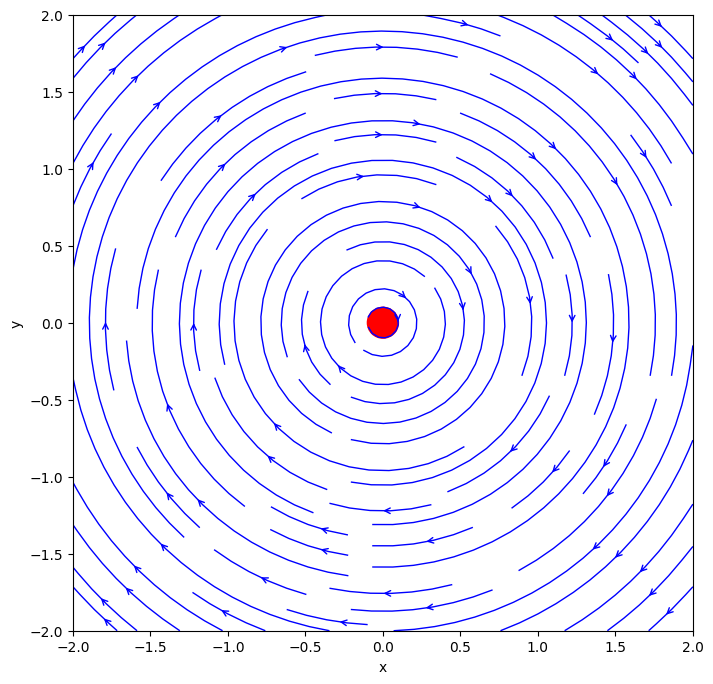

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the current strength and location
I = 1.0  # current strength
x_c = 0.0  # current x-coordinate
y_c = 0.0  # current y-coordinate

# Define the mesh grid of points
x, y = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

# Define the magnetic field components due to the magnet
r = np.sqrt((x-x_c)**2 + (y-y_c)**2)
B_x = I * (y-y_c) / r**3
B_y = -I * (x-x_c) / r**3

# Plot the magnetic field lines
fig, ax = plt.subplots(figsize=(8, 8))
ax.streamplot(x, y, B_x, B_y, color='blue', linewidth=1, density=1, arrowstyle='->')

# Add the wire to the plot
circle = plt.Circle((x_c, y_c), 0.1, color='red')
ax.add_artist(circle)

# Set the plot limits and axis labels
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()


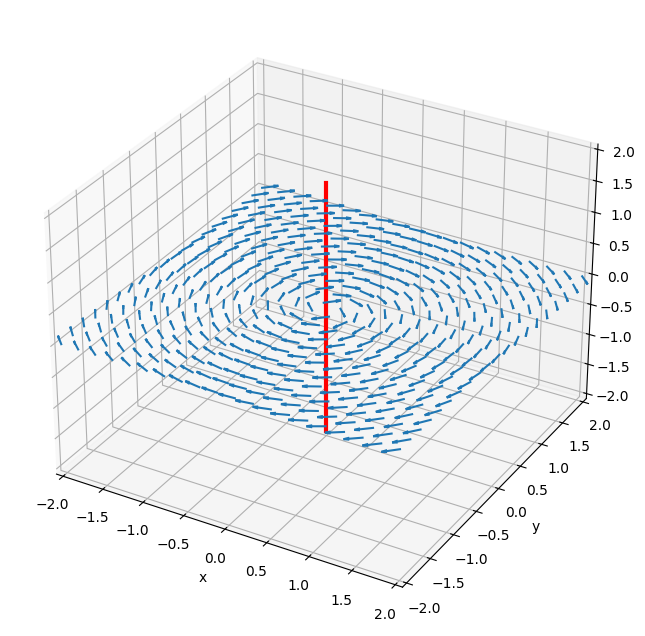

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the magnet strength and location
I = 1.0  # current strength
x_c = 0.0  # current x-coordinate
y_c = 0.0  # current y-coordinate


# Define the mesh grid of points
x, y, z = np.meshgrid(np.linspace(-2, 2, 20),
                      np.linspace(-2, 2, 20),
                      [0])

# Define the magnetic field components due to the current
r = np.sqrt((x-x_c)**2 + (y-y_c)**2 + (z)**2)
B_x = I * (y-y_c) / r**3
B_y = -I * (x-x_c) / r**3
B_z = np.zeros_like(r)

# Create the figure and axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the quiver plot of the magnetic field
ax.quiver(x, y, z, B_x, B_y, B_z, length=0.2, normalize=True)

# Plot the wire carrying the current
z_wire = np.linspace(-2, 2, 50)
x_wire = np.zeros_like(z_wire)
y_wire = np.zeros_like(z_wire)
ax.plot(x_wire, y_wire, z_wire, lw=3, color='red')


# Set the plot limits and axis labels
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Show the plot
plt.show()

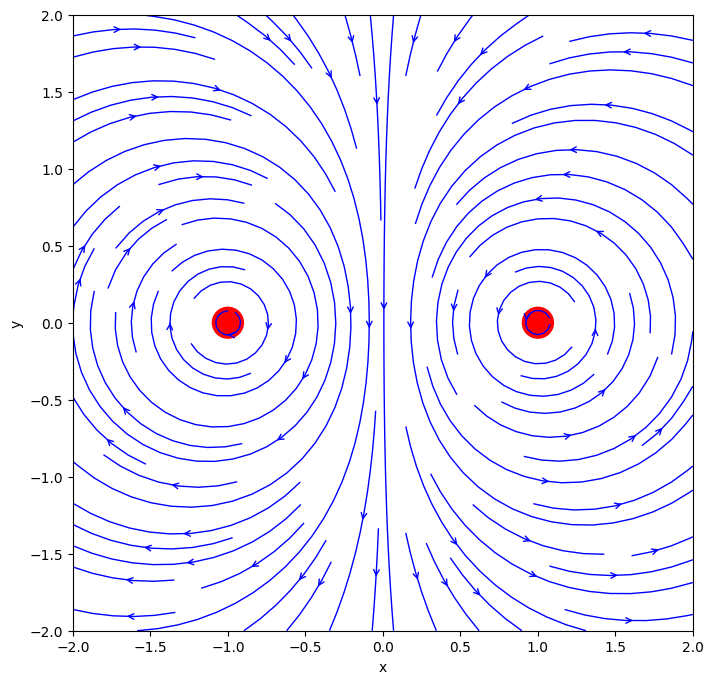

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_parallel_wires(I_1, x_c1, y_c1, I_2, x_c2, y_c2):
    # Define the mesh grid of points
    x, y = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

    # Define the magnetic field components due to the currents
    r1 = np.sqrt((x-x_c1)**2 + (y-y_c1)**2)
    B_x1 = I_1 * (y-y_c1) / r1**3
    B_y1 = -I_1 * (x-x_c1) / r1**3

    r2 = np.sqrt((x-x_c2)**2 + (y-y_c2)**2)
    B_x2 = I_2 * (y-y_c2) / r2**3
    B_y2 = -I_2 * (x-x_c2) / r2**3

    B_x = B_x1 + B_x2
    B_y = B_y1 + B_y2

    # Plot the magnetic field lines
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.streamplot(x, y, B_x, B_y, color='blue', linewidth=1, density=1, arrowstyle='->')

    # Add the wires
    circle = plt.Circle((x_c1, y_c1), 0.1, color='red')
    ax.add_artist(circle)
    circle = plt.Circle((x_c2, y_c2), 0.1, color='red')
    ax.add_artist(circle)

    # Set the plot limits and axis labels
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Show the plot
    plt.show()

plot_parallel_wires(1.0, -1.0, 0.0, -1.0, 1.0, 0.0)


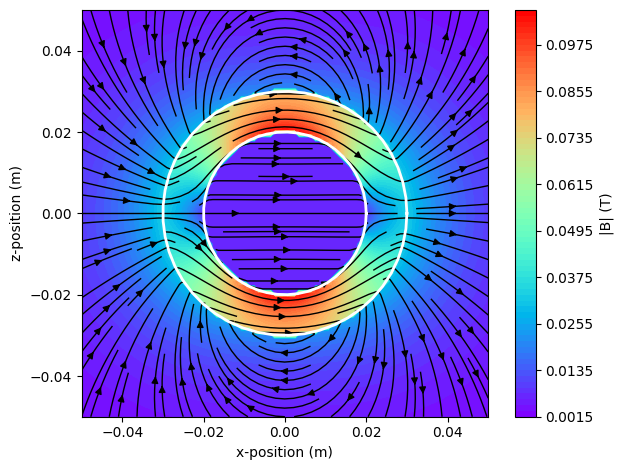

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import magpylib as magpy

# Create a Matplotlib figure
fig, ax = plt.subplots()

# Create an observer grid in the xy-symmetry plane - using pure numpy
grid = np.mgrid[-.05:.05:100j, -.05:.05:100j, 0:0:1j].T[0]
X, Y, _ = np.moveaxis(grid, 2, 0)

# Compute magnetic field on grid - using the functional interface
B = magpy.getB(
    "CylinderSegment",
    observers=grid.reshape(-1, 3),
    dimension=(0.02, 0.03, 0.05, 0, 360),
    polarization=(0.1, 0, 0),
)
B = B.reshape(grid.shape)
Bx, By, _ = np.moveaxis(B, 2, 0)
normB = np.linalg.norm(B, axis=2)

# Combine streamplot with contourf
cp = ax.contourf(X, Y, normB, cmap="rainbow", levels=100)
splt = ax.streamplot(X, Y, Bx, By, color="k", density=1.5, linewidth=1)

# Add colorbar
fig.colorbar(cp, ax=ax, label="|B| (T)")

# Outline magnet boundary
ts = np.linspace(0, 2 * np.pi, 50)
ax.plot(.03*np.cos(ts), .03*np.sin(ts), "w-", lw=2, zorder=2)
ax.plot(.02*np.cos(ts), .02*np.sin(ts), "w-", lw=2, zorder=2)

# Figure styling
ax.set(
    xlabel="x-position (m)",
    ylabel="z-position (m)",
    aspect=1,
)

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


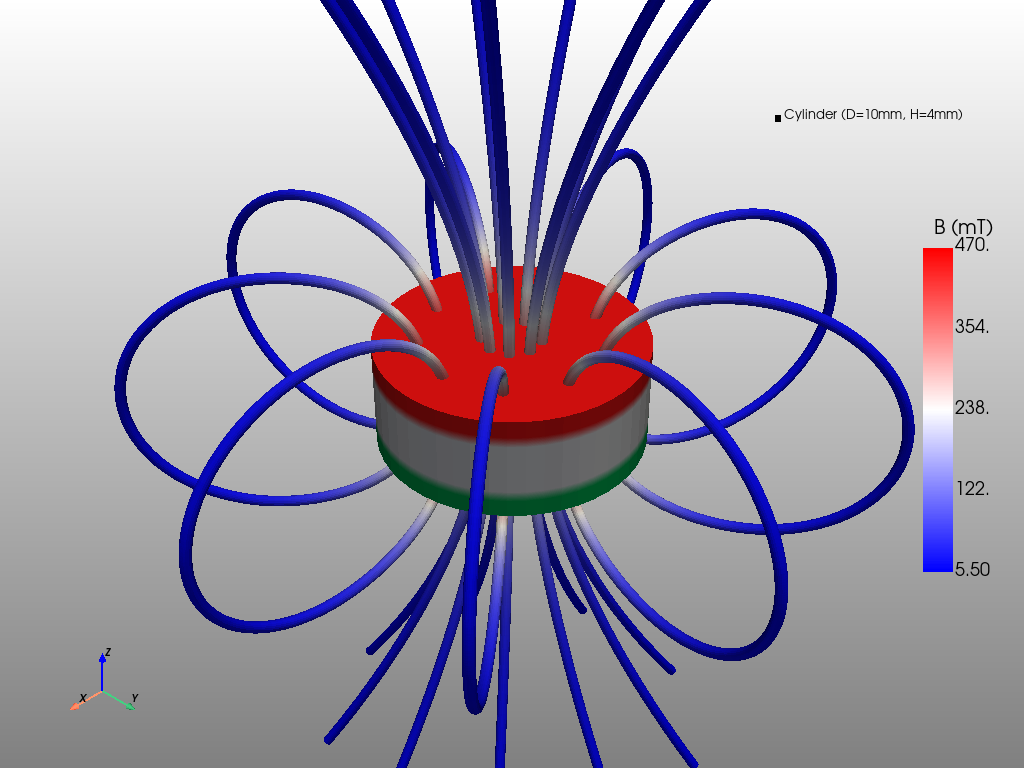

: 

In [10]:
import magpylib as magpy
import pyvista as pv

# Create a magnet with Magpylib
magnet = magpy.magnet.Cylinder(polarization=(0, 0, 1), dimension=(0.010, 0.004))

# Create a 3D grid with Pyvista
grid = pv.ImageData(
    dimensions=(41, 41, 41),
    spacing=(0.001, 0.001, 0.001),
    origin=(-0.02, -0.02, -0.02),
)

# Compute B-field and add as data to grid
grid["B"] = magnet.getB(grid.points) * 1000  # T -> mT

# Compute the field lines
seed = pv.Disc(inner=0.001, outer=0.003, r_res=1, c_res=9)
strl = grid.streamlines_from_source(
    seed,
    vectors="B",
    max_step_length=0.1,
    max_time=.02,
    integration_direction="both",
)

# Create a Pyvista plotting scene
pl = pv.Plotter()

# Add magnet to scene
magpy.show(magnet, canvas=pl, backend="pyvista")

# Prepare legend parameters
legend_args = {
    "title": "B (mT)",
    "title_font_size": 20,
    "color": "black",
    "position_y": 0.25,
    "vertical": True,
}

# Add streamlines and legend to scene
pl.add_mesh(
    strl.tube(radius=0.0002),
    cmap="bwr",
    scalar_bar_args=legend_args,
)

# Prepare and show scene
pl.camera.position = (0.03, 0.03, 0.03)
pl.show()

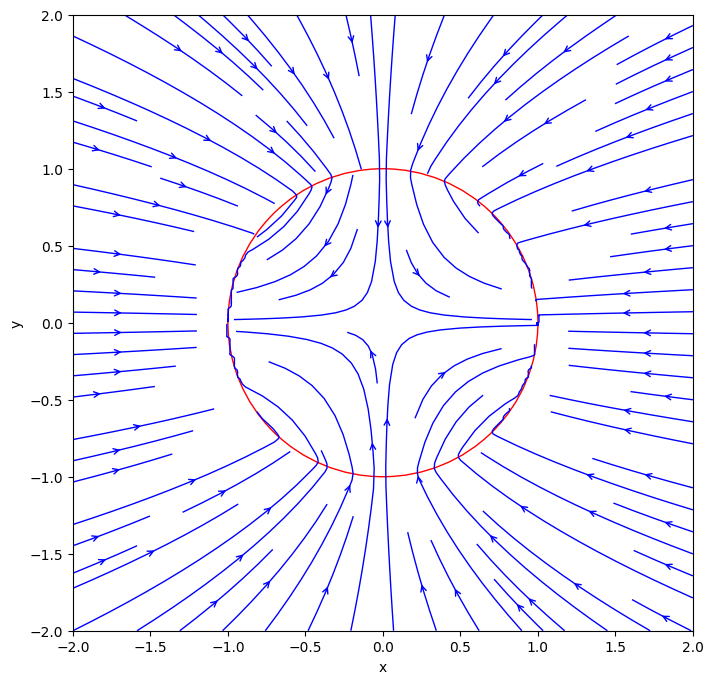

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants
A = 1.0  # Amplitude of the magnetic field
R = 1.0  # Radius of the ring
x_c = 0.0  # Center x-coordinate of the ring
y_c = 0.0  # Center y-coordinate of the ring

# Define the mesh grid of points
x, y = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

# Define the polar coordinates
r = np.sqrt((x-x_c)**2 + (y-y_c)**2)
theta = np.arctan2(y-y_c, x-x_c)

# Initialize the magnetic field components
B_x = np.zeros_like(x)
B_y = np.zeros_like(y)

# Inside the ring
inside_ring = r <= R
B_x[inside_ring] = A * np.cos(theta[inside_ring])
B_y[inside_ring] = -A * np.sin(theta[inside_ring])

# Outside the ring
outside_ring = r > R
B_x[outside_ring] = -2 * A * R**3 * np.cos(theta[outside_ring]) / r[outside_ring]**3
B_y[outside_ring] = -A * R**3 * np.sin(theta[outside_ring]) / r[outside_ring]**3

# Plot the magnetic field lines
fig, ax = plt.subplots(figsize=(8, 8))
ax.streamplot(x, y, B_x, B_y, color='blue', linewidth=1, density=1, arrowstyle='->')

# Add the ring to the plot
circle = plt.Circle((x_c, y_c), R, color='red', fill=False)
ax.add_artist(circle)

# Set the plot limits and axis labels
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()
